## 计算观测场，预报场的领域检验相关统计量

In [1]:
import sys
sys.path.append('../')
from fuzzy_logic.lib.make_spatialVx import make_spatialVx
# pip install pyreadr
# pip install pynverse
import pyreadr
from fuzzy_logic.hoods2d import hoods2d
import numpy as np
import matplotlib.pyplot as plt

## hoods2d

### 本方法根据输入的which_stats参数不同，对观测场和预报场使用领域方法 (cf. Ebert 2008, 2009; Gilleland et al., 2009, 2010) ，即使用平滑滤波器处理原始场或使用经过threshold处理过后的二值场，并对相应的结果计算相关统计值。

### 为方便说明，使用以下记号： 对于观测场，如果使用了领域平滑则标记为\<X\>s， 其对应的二值场为\<Ix\>s，如果没经过领域平滑则写作X和Ix，如果经过threshold处理过的二值场使用领域平滑，则写作\<Px\>s，预报场同理。NO-NF代表观测场预报场均进行过领域平滑处理，SO-NF代表观测场未进行领域平滑处理，预报场进行了领域平滑处理。

<font face="黑体" color=Blue size=3>**hoods2d(input_object, which_methods=None, time_point=1,
            obs=0, model=0, levels=None, max_n=None, rule=">=", verbose=False)**</font>   
  
|参数|可选参数|说明|    
|:--|:--|:--|
|**<font face="黑体" color=Blue size=5>input_object</font>**|| make_spatialVx的结果  | 
|**which_stats**|| which_methos 表示需要计算的统计量，类型为list，list可选元素及计算值的含义为以下|
||*mincvr*| NO-NF， 使用最小覆盖法（minimum coverage method）比较 \<Ix\>s， \<Iy\>s|
||*multi_event*| SO-NF， Multi-event Contingency Table 方法分析 Ix 和 \<Iy\>s|
||*fuzzy*| NO-NF，模糊逻辑比较 \<Px\>s to \<Py\>s|
||*joint*| NO-NF，与fuzzy类似, 但 hits = sum_i prod(\<Px\>s_i,\<Py\>s_i), misses = sum_i prod(\<Px\>s_i,1-\<Py\>s_i), false alarms = sum_i prod(1-\<Px\>s_i,\<Py\>s_i), correct negatives = sum_i prod(1-\<Px\>s_i,1-\<Py\>s_i) |
||*fss*| NO-NF,使用 Fractions Brier， Fractions Skill Score直接比较\<Px\>s and \<Py\>s |
||*pragmatic*| SO-NF，使用Brier， Brier Skill Score 比较 Ix \<Py\>s, |  
|**time_point**|| 整数，代表分析的时间序号 |  
|**obs**|| 整数，代表分析的观测场序号 |  
|**model**|| 整数，代表分析的预报场序号 | 
|**levels**|| 数组，元素应为数字， 平滑过程的对应参数 |       
|**max_n**|| 数字， 代表最大领域长度，仅在levels为None时设置，否则设为None | 
|**rule**|| 字符串，代表threshold的规则，可选值为 >=, >, <, <= |  
|**verbose**|| 布尔值，是否打印日志 |  
**调用示例**


In [2]:
# 使用make_spatialVx 进行准备工作，详细输入输出参考make_spatialVx文档
geom000 = pyreadr.read_r('./data/geom000.Rdata')['geom000']
geom001 = pyreadr.read_r('./data/geom001.Rdata')['geom001']
ICPg240Locs = pyreadr.read_r('./data/ICPg240Locs.Rdata')['ICPg240Locs']
hold = make_spatialVx(geom000, geom001, loc=ICPg240Locs, fieldtype="Geometric Objects Pretending to be Precipitation",
                          units="mm/h", thresholds = [0.01, 50.01],
                          dataname="ICP Geometric Cases", obsname="geom000", modelname="geom001")

<font face="黑体" color=green size=4>**返回结果内容说明**</font> 

*根据which_methods中的值，返回对应的结果*


|一级关键词|说明|
|:--|:--|
|**<font face="黑体" color=green size=3>mincvr</font>**| 字典， 包含pod, far, ets |
|**<font face="黑体" color=green size=3>multi_event</font>**| 字典， 包含pod, f, hk |
|**<font face="黑体" color=green size=3>fuzzy</font>**| 字典， 包含pod, far, ets |
|**<font face="黑体" color=green size=3>joint</font>**| 字典， 包含pod, far, ets |
|**<font face="黑体" color=green size=3>fss</font>**| 字典， 包含fss, fss_uniform, fss_random |
|**<font face="黑体" color=green size=3>pragmatic</font>**| 字典， 包含bs, bss |

部分结果含义如下，具体可以参考最后的相关文献:

|结果成员|说明|
|:--|:--|
|**<font face="黑体" color=green size=3>pod</font>**| 命中/(命中+ 失误) |
|**<font face="黑体" color=green size=3>far</font>**| 误报率，误报/(命中+误报) |
|**<font face="黑体" color=green size=3>f</font>**| 错误检测率 误报/（正确拒绝+误报） |
|**<font face="黑体" color=green size=3>ets</font>**| 公平威胁得分，（命中-hits_random）/（命中+失误+误报-hits_random） hits_random是观测事件数乘以预测事件数除以总预测数 |
|**<font face="黑体" color=green size=3>hk</font>**| pod - f |
|**<font face="黑体" color=green size=3>bs</font>**| 均方根误差 |

In [3]:
look = hoods2d(hold, levels=[1, 3, 9, 17, 33, 65, 129, 257], verbose=True)

Looping through thresholds.


 Setting up binary objects for threshold  0 

Looping through levels.

Neighborhood length =  1 

Neighborhood length =  3 

Neighborhood length =  9 

Neighborhood length =  17 

Neighborhood length =  33 

Neighborhood length =  65 

Neighborhood length =  129 

Neighborhood length =  257 


 Setting up binary objects for threshold  1 

Looping through levels.

Neighborhood length =  1 

Neighborhood length =  3 

Neighborhood length =  9 

Neighborhood length =  17 

Neighborhood length =  33 

Neighborhood length =  65 

Neighborhood length =  129 

Neighborhood length =  257 

7.774854421615601


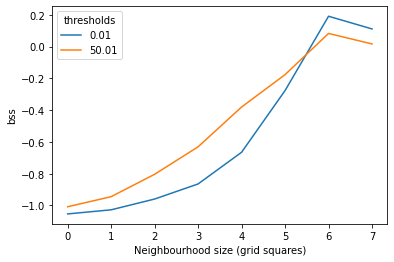

In [4]:
bss = look["pragmatic"]["bss"]
pltx = bss.shape[0]
plt.plot(bss[:, 0], label = 0.01)
plt.plot(bss[:, 1], label = 50.01)
plt.xlabel("Neighbourhood size (grid squares)")
plt.ylabel("bss")
plt.legend(title="thresholds")

### 对应的参考文献
mincvr: 
 - Ebert, E. E. (2008) Fuzzy verification of high resolution gridded forecasts: A review and proposed framework. Meteorol. Appl., 15, 51–64. doi:10.1002/met.25
 - Ebert, E. E. (2009) Neighborhood verification: A strategy for rewarding close forecasts. Wea. Forecasting, 24, 1498–1510, doi:10.1175/2009WAF2222251.1.

multi_event:
 - Atger, F. (2001) Verification of intense precipitation forecasts from single models and ensemble prediction systems. Nonlin. Proc. Geophys., 8, 401–417.

fuzzy:
 - Ebert, E. E. (2008) Fuzzy verification of high resolution gridded forecasts: A review and proposed framework. Meteorol. Appl., 15, 51–64. doi:10.1002/met.25

joint:
 - Ebert, E. E. (2008) Fuzzy verification of high resolution gridded forecasts: A review and proposed framework. Meteorol. Appl., 15, 51–64. doi:10.1002/met.25

fss:
 - Roberts, N. M. and Lean, H. W. (2008) Scale-selective verification of rainfall accumulations from high-resolution forecasts of convective events. Mon. Wea. Rev., 136, 78–97. doi:10.1175/2007MWR2123.1.

pragmatic:
 - Theis, S. E., Hense, A. Damrath, U. (2005) Probabilistic precipitation forecasts from a deterministic model: A pragmatic approach. Meteorol. Appl., 12, 257–268.